##### Loading Imports & the Dataset

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler

from sklearn.calibration import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
# Loading the csv data file to a Pandas DataFrame
dataset = pd.read_csv('/Users/ibrahimharoon/Documents/Uni/Year 3/Final Project/Stroke Prediction Tool/app/data/dataset1.csv')

##### Dataset Analysis

1. Finding the total rows and columns

In [3]:
# Finding the total rows and columns
dataset.shape

(5110, 12)

2. Identifying data types

In [4]:
# Printing the first 5 rows of the dataset
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


3. Checking for missing values

In [5]:
# Checking if there are any missing values in each column
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

4. Checking for outliers in numerical columns

[Text(0.5, 1.0, 'Avg Glucose Level')]

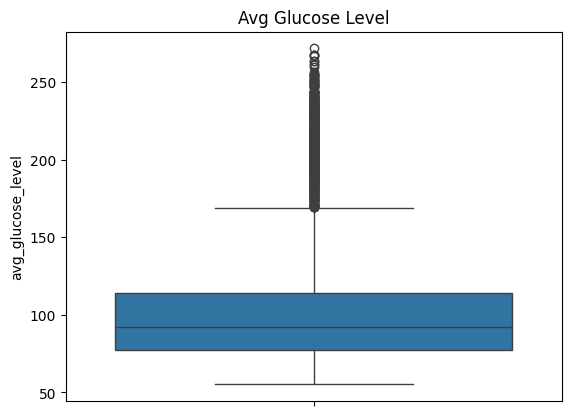

In [6]:
sns.boxplot(data=dataset['avg_glucose_level']).set(title="Avg Glucose Level")

[Text(0.5, 1.0, 'BMI')]

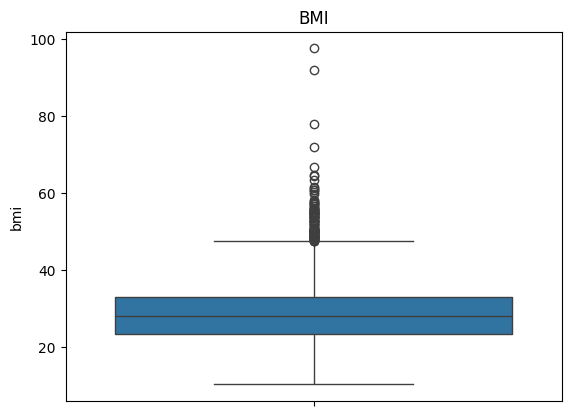

In [7]:
sns.boxplot(data=dataset['bmi']).set(title="BMI")

5. Checking if the distribution of stroke is balanced

In [8]:
#'1' who had a stroke and '0' who did not have a stroke.
dataset['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

##### Preprocessing 1: Imputation & Oversampling

1. Creating a copy of the original dataset

In [9]:
datasetCopy = dataset.copy()

2. Removing the id column

In [10]:
datasetCopy = datasetCopy.drop('id', axis=1)

3. Binary encoding

In [11]:
datasetCopy['ever_married'] = datasetCopy['ever_married'].replace({'No' : 0, 'Yes' : 1})
datasetCopy['Residence_type'] = datasetCopy['Residence_type'].replace({'Rural' : 0, 'Urban' : 1})

/var/folders/bb/svpj70fx13s2njbdm71g6vnr0000gn/T/ipykernel_51843/773968758.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datasetCopy['ever_married'] = datasetCopy['ever_married'].replace({'No' : 0, 'Yes' : 1})
/var/folders/bb/svpj70fx13s2njbdm71g6vnr0000gn/T/ipykernel_51843/773968758.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datasetCopy['Residence_type'] = datasetCopy['Residence_type'].replace({'Rural' : 0, 'Urban' : 1})


4. One Hot Encoding

In [12]:
datasetCopy = pd.get_dummies(datasetCopy, columns=['gender', 'work_type', 'smoking_status'])

In [13]:
datasetCopy.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,1,228.69,36.6,1,False,True,False,False,False,True,False,False,False,True,False,False
1,61.0,0,0,1,0,202.21,NaN,1,True,False,False,False,False,False,True,False,False,False,True,False
2,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,False,True,False,False,False,False,True,False
3,49.0,0,0,1,1,171.23,34.4,1,True,False,False,False,False,True,False,False,False,False,False,True
4,79.0,1,0,1,0,174.12,24.0,1,True,False,False,False,False,False,True,False,False,False,True,False


5. Splitting the dataset into features and target

In [14]:
x = datasetCopy.drop(columns='stroke', axis=1)
y = datasetCopy['stroke']

6. Train - test split

In [15]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, train_size=0.7, shuffle=True, random_state=1)

7. Replacing missing values with imputed values

In [16]:
imputer = KNNImputer()
imputer.fit(X_Train)

X_Train = pd.DataFrame(imputer.transform(X_Train), index=X_Train.index, columns=X_Train.columns)
X_Test = pd.DataFrame(imputer.transform(X_Test), index=X_Test.index, columns=X_Test.columns)

8. Oversampling/Undersampling

In [17]:
# SMOTE Oversampling
smote = SMOTE(sampling_strategy=0.5, random_state=1)  # Adjust the ratio as needed
X_Train_Oversampled, Y_Train_Oversampled = smote.fit_resample(X_Train, Y_Train)

In [18]:
# Undersampling
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=1)  # Adjust the ratio as needed
X_Train_Undersampled, Y_Train_Undersampled = undersampler.fit_resample(X_Train, Y_Train)

9. Scaling values

In [19]:
scaler = StandardScaler()

# Oversampled Set
scaler.fit(X_Train_Oversampled)
X_Train_Oversampled = pd.DataFrame(scaler.transform(X_Train_Oversampled), index=X_Train_Oversampled.index, columns=X_Train_Oversampled.columns)
X_Test_Oversampled = pd.DataFrame(scaler.transform(X_Test), index=X_Test.index, columns=X_Test.columns)

# Undersample Sey
scaler.fit(X_Train_Undersampled)
X_Train_Undersampled = pd.DataFrame(scaler.transform(X_Train_Undersampled), index=X_Train_Undersampled.index, columns=X_Train_Undersampled.columns)
X_Test_Undersampled = pd.DataFrame(scaler.transform(X_Test), index=X_Test.index, columns=X_Test.columns)

In [20]:
# Checking standard Deviation
print(X_Train_Oversampled.std())
print(X_Train_Undersampled.std())

age                               1.000098
hypertension                      1.000098
heart_disease                     1.000098
ever_married                      1.000098
Residence_type                    1.000098
avg_glucose_level                 1.000098
bmi                               1.000098
gender_Female                     1.000098
gender_Male                       1.000098
gender_Other                      0.000000
work_type_Govt_job                1.000098
work_type_Never_worked            1.000098
work_type_Private                 1.000098
work_type_Self-employed           1.000098
work_type_children                1.000098
smoking_status_Unknown            1.000098
smoking_status_formerly smoked    1.000098
smoking_status_never smoked       1.000098
smoking_status_smokes             1.000098
dtype: float64
age                               1.001006
hypertension                      1.001006
heart_disease                     1.001006
ever_married                      1.001

##### Model Training & Evaluation

In [21]:
models = {
    "                   Logistic Regression": LogisticRegression(class_weight='balanced'),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(class_weight='balanced'),
    "                     Gradient Boosting": GradientBoostingClassifier(),
}

In [22]:
# Loop through the models
for name, model in models.items():
    
    # Train on oversampled data
    model.fit(X_Train_Oversampled, Y_Train_Oversampled)
    
    # Predictions for oversampled test set
    oversampled_test_preds = model.predict(X_Test_Oversampled)
    oversampled_test_probs = model.predict_proba(X_Test_Oversampled)[:, 1]  # Probability estimates
    
    # Train on undersampled data
    model.fit(X_Train_Undersampled, Y_Train_Undersampled)
    
    # Predictions for undersampled test set
    undersampled_test_preds = model.predict(X_Test_Undersampled)
    undersampled_test_probs = model.predict_proba(X_Test_Undersampled)[:, 1]  # Probability estimates
    
    # Calculate accuracy and F1 score for oversampled data
    oversampled_test_acc = accuracy_score(Y_Test, oversampled_test_preds)
    oversampled_test_f1 = f1_score(Y_Test, oversampled_test_preds)
    oversampled_test_auc = roc_auc_score(Y_Test, oversampled_test_probs)  # AUC Score
    
    # Calculate accuracy and F1 score for undersampled data
    undersampled_test_acc = accuracy_score(Y_Test, undersampled_test_preds)
    undersampled_test_f1 = f1_score(Y_Test, undersampled_test_preds)
    undersampled_test_auc = roc_auc_score(Y_Test, undersampled_test_probs)  # AUC Score
    

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [23]:
# Print results
for name, model in models.items():
    print(f"Model: {name}")
    print(f"--- Oversampled Data ---")
    print(f"Test Accuracy: {oversampled_test_acc:.4f}")
    print(f"Test F1 Score: {oversampled_test_f1:.4f}")
    print(f"Test AUC Score: {oversampled_test_auc:.4f}")
    
    print(f"--- Undersampled Data ---")
    print(f"Test Accuracy: {undersampled_test_acc:.4f}")
    print(f"Test F1 Score: {undersampled_test_f1:.4f}")
    print(f"Test AUC Score: {undersampled_test_auc:.4f}")
    
    print("\n" + "="*50 + "\n")

Model:                    Logistic Regression
--- Oversampled Data ---
Test Accuracy: 0.9452
Test F1 Score: 0.0455
Test AUC Score: 0.8002
--- Undersampled Data ---
Test Accuracy: 0.8324
Test F1 Score: 0.2920
Test AUC Score: 0.8512


Model:                    K-Nearest Neighbors
--- Oversampled Data ---
Test Accuracy: 0.9452
Test F1 Score: 0.0455
Test AUC Score: 0.8002
--- Undersampled Data ---
Test Accuracy: 0.8324
Test F1 Score: 0.2920
Test AUC Score: 0.8512


Model:                          Decision Tree
--- Oversampled Data ---
Test Accuracy: 0.9452
Test F1 Score: 0.0455
Test AUC Score: 0.8002
--- Undersampled Data ---
Test Accuracy: 0.8324
Test F1 Score: 0.2920
Test AUC Score: 0.8512


Model:                         Neural Network
--- Oversampled Data ---
Test Accuracy: 0.9452
Test F1 Score: 0.0455
Test AUC Score: 0.8002
--- Undersampled Data ---
Test Accuracy: 0.8324
Test F1 Score: 0.2920
Test AUC Score: 0.8512


Model:                          Random Forest
--- Oversampled Data -